In [90]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy.io import loadmat
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import tensorflow.compat.v1 as tf
import random
import cv2

from tensorflow.python.client import device_lib
from tensorflow.compat.v1.keras.preprocessing import image
from tensorflow.compat.v1.keras.optimizers import Adam
from tensorflow.compat.v1.keras.preprocessing.image import ImageDataGenerator

In [15]:
tf.__version__

'1.15.5'

In [16]:
def test_gpu():
    tf.enable_eager_execution(tf.ConfigProto(log_device_placement=True))
    print(tf.add([1.0, 2.0], [3.0, 4.0])) # Create two tensors for gpu test.

In [17]:
test_gpu()

Executing op Add in device /job:localhost/replica:0/task:0/device:DML:0
tf.Tensor([4. 6.], shape=(2,), dtype=float32)


In [18]:
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

In [19]:
print(get_available_devices()) # Return a list of devices we can use in the notebook.

['/device:CPU:0', '/device:DML:0']


In [26]:
def get_data(dir_):
    data = loadmat(dir_)
    
    return data['X'], data['y']

In [87]:
def loading_data():
    X_train, y_train = get_data('train_32x32.mat')
    X_test, y_test = get_data('test_32x32.mat')
    X_extra, y_extra = get_data('extra_32x32.mat')
    
    X_train, y_train = X_train.transpose((3, 0, 1, 2)), y_train[:, 0]
    X_test, y_test = X_test.transpose((3, 0, 1, 2)), y_test[:, 0]
    X_extra, y_extra = X_extra.transpose((3, 0, 1, 2)), y_extra[:, 0]
                                                                
    return X_train, y_train, X_test, y_test, X_extra, y_extra

In [88]:
X_train, y_train, X_test, y_test, X_extra, y_extra = loading_data()

In [28]:
print(X_train.shape)

(32, 32, 3, 73257)


In [73]:
def image_view(X_train, y_train, row, column):
    fig, axes = plt.subplots(row, column)
    for iter_, ax in enumerate(axes.flat):
        ax.imshow(X_train[iter_])
        ax.axis('off')

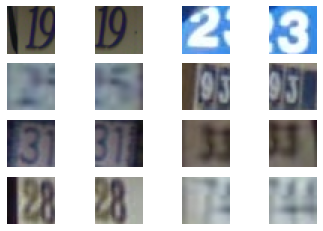

In [74]:
image_view(X_train, y_train, 4, 4)

In [84]:
def training_splitting(X_train, y_train):
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.25
    )
    
    return X_train, X_val, y_train, y_val

In [85]:
X_train, X_val, y_train, y_val = training_splitting(X_train, y_train)

In [96]:
def img_to_gray(images):
    imgs_grayscale = []
    except_counter = 0
    
    for iter_ in images:
        try:
            img = images[iter_]
            img_g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            imgs_grayscale.append(img_g)
            
        except:
            except_counter = except_counter + 1
            
    print('Not converted to grayscale count: ', except_conter)
    
    return imgs_grayscale

In [ ]:
train_grayscale = img_to_gray(X_train)
test_grayscale = img_to_gray(X_test)
val_grayscale = img_to_gray(X_val)
extra_grayscale = img_to_gray(X_extra)

In [ ]:
def enc_inicializer(y_train):
    enc = OneHotEncoder().fit(y_train.reshape(-1, 1))
    
    return enc

In [ ]:
def encoding_data(y_train, y_test, y_val, y_extra):
    y_train = enc.transform(y_train.reshape(-1, 1).toarray())
    y_test = enc.transform(y_test.reshape(-1, 1).toarray())
    y_val = enc.transform(y_val.reshape(-1, 1).toarray())
    y_extra = enc.transform(y_extra.reshape(-1, 1).toarray())

In [ ]:
y_train, y_test, y_val, y_extra = encoding_data(y_train, y_test, y_val, y_extra)